# Brain Stroke Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing Dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# Missing Values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# Filling missing values using knn imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputer.fit(df[["bmi"]])
df["bmi"] = imputer.transform(df[["bmi"]])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [11]:
df.groupby('gender').agg({'age':'mean','heart_disease':'mean','hypertension':'mean','avg_glucose_level':'mean','stroke':'mean'})

,age,heart_disease,hypertension,avg_glucose_level,stroke
gender,,,,,
Female,43.757395,0.037742,0.092184,104.057809,0.047094
Male,42.483385,0.077069,0.104965,109.088520,0.051064
Other,26.000000,0.000000,0.000000,143.330000,0.000000


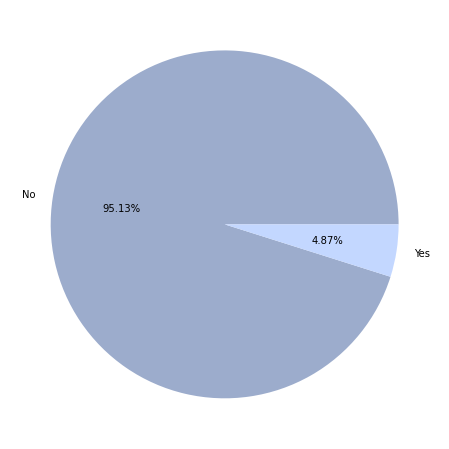

In [12]:
fig,ax = plt.subplots(figsize=(10,8));
plt.pie(df['stroke'].value_counts(),labels=['No','Yes'],autopct='%0.02f%%',colors=['#9caccc','#c3d7ff']);

Text(0.5, 1.0, 'Distribution of Age')

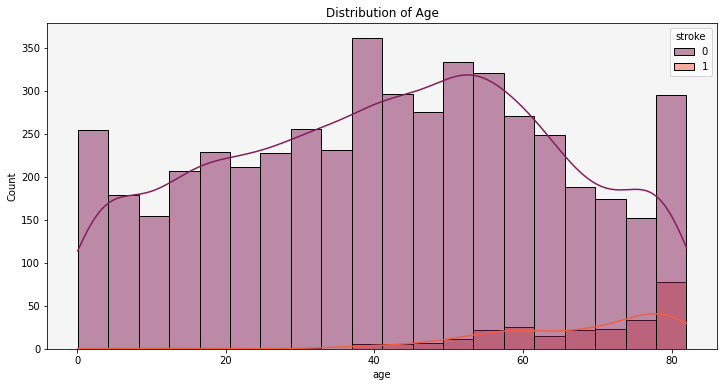

In [13]:
fig,ax=plt.subplots(figsize=(12,6))
ax.set_facecolor('#f6f5f5')
sns.histplot(data = df,x='age',hue='stroke',kde=True,ax=ax,palette='rocket');
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of BMI')

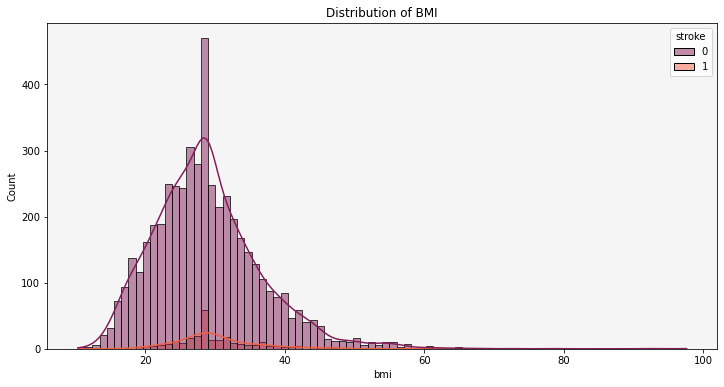

In [14]:
fig,ax=plt.subplots(figsize=(12,6))
ax.set_facecolor('#f6f5f5')
sns.histplot(data = df,x='bmi',hue='stroke',kde=True,ax=ax,palette='rocket');
plt.title('Distribution of BMI')

Text(0.5, 1.0, 'Distribution of Average Glucose Level')

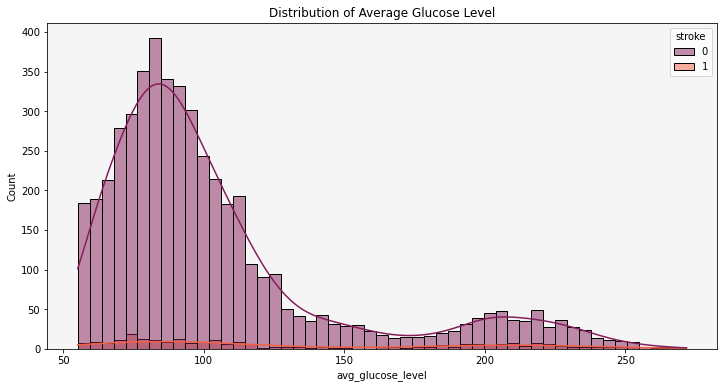

In [15]:
fig,ax=plt.subplots(figsize=(12,6))
ax.set_facecolor('#f6f5f5')
sns.histplot(data = df,x='avg_glucose_level',hue='stroke',kde=True,ax=ax,palette='rocket');
plt.title('Distribution of Average Glucose Level')

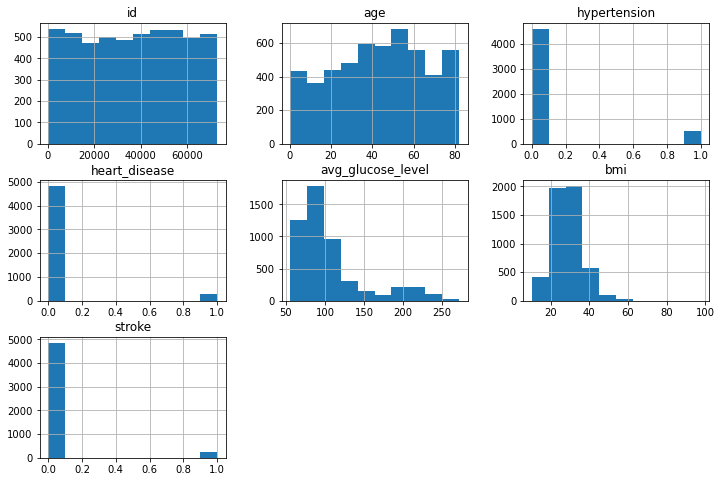

In [16]:
df.hist(figsize=(12,8));

Text(0.5, 1.0, 'Heatmap of numerical featuers')

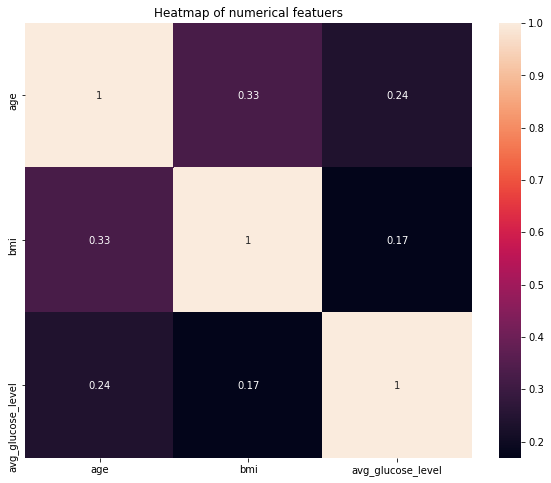

In [17]:
fig,ax = plt.subplots(figsize=(10,8));
ax.set_facecolor('#f6f5f5')
sns.heatmap(df[['age','bmi','avg_glucose_level']].corr(),annot=True);
plt.title("Heatmap of numerical featuers")

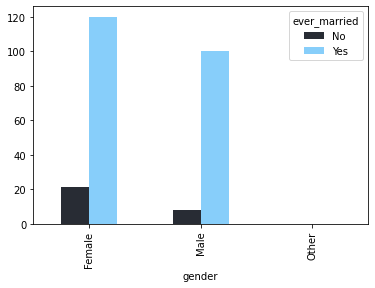

In [18]:
pd.pivot_table(df,values='stroke',aggfunc='sum',index='gender',columns='ever_married').plot(kind='bar',color=['#282c34','#87cefa']);

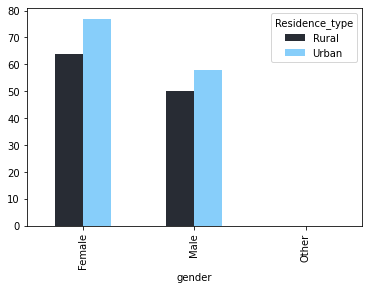

In [19]:
pd.pivot_table(df,values='stroke',aggfunc='sum',index='gender',columns='Residence_type').plot(kind='bar',color=['#282c34','#87cefa']);

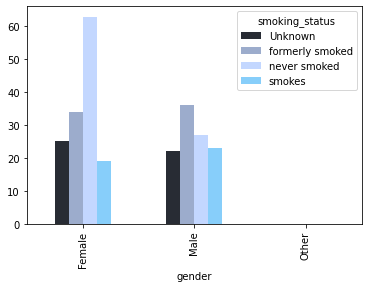

In [20]:
pd.pivot_table(df,values='stroke',aggfunc='sum',index='gender',columns='smoking_status').plot(kind='bar',color=['#282c34','#9caccc','#c3d7ff','#87cefa']);

d:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


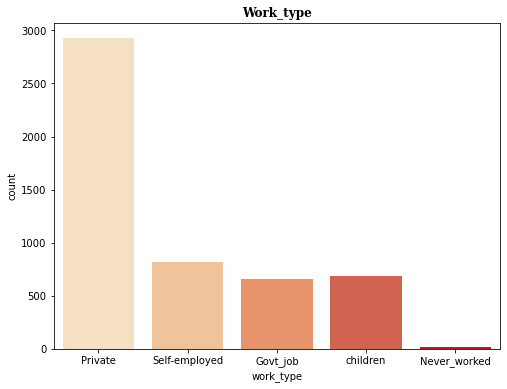

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(df['work_type'],palette='OrRd');
plt.title('Work_type',fontweight='bold',fontfamily='serif');

In [71]:
X = pd.get_dummies(df.drop(['id','stroke'],axis=1),drop_first=True)
y = df['stroke']

# Over sampling with SMOTE

In [104]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=21)
X, y = oversample.fit_resample(X, y)

In [105]:
y.value_counts()

0    4861
1    4861
Name: stroke, dtype: int64

In [106]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [107]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=21)

# Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()
log_r.fit(X_train,y_train)

LogisticRegression()

In [109]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_test, log_r.predict_proba(X_test)[:,1])
auc(fpr, tpr)

0.9388893119759011

Text(0, 0.5, 'recall')

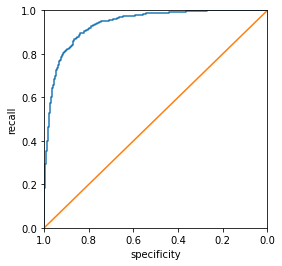

In [110]:
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})
ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')


In [111]:
from sklearn.metrics import confusion_matrix,classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test, log_r.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1459
           1       0.86      0.87      0.86      1458

    accuracy                           0.86      2917
   macro avg       0.86      0.86      0.86      2917
weighted avg       0.86      0.86      0.86      2917



In [112]:
confusion_matrix(y_test, log_r.predict(X_test))

array([[1249,  210],
       [ 188, 1270]], dtype=int64)

In [113]:
print('intercept ', log_r.intercept_[0])
print('classes', log_r.classes_)
pd.DataFrame({'coeff': log_r.coef_[0]}, index=X.columns)

intercept  -2.6522242168805605
classes [0 1]


,coeff
age,7.793235
hypertension,-0.438258
heart_disease,-0.911822
avg_glucose_level,1.286714
bmi,1.935834
gender_Male,-0.806449
gender_Other,-0.047739
ever_married_Yes,-0.853804
work_type_Never_worked,-0.695718
work_type_Private,-1.318602


# Decision Tree

In [114]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

d:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


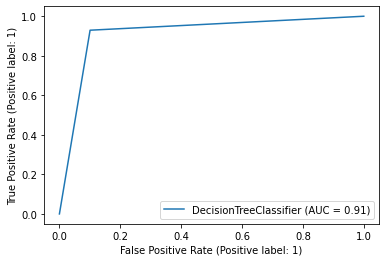

In [115]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dtree, X_test, y_test)

In [116]:
print(classification_report(y_test, dtree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1459
           1       0.90      0.93      0.92      1458

    accuracy                           0.91      2917
   macro avg       0.91      0.91      0.91      2917
weighted avg       0.91      0.91      0.91      2917



In [117]:
confusion_matrix(y_test, dtree.predict(X_test))

array([[1312,  147],
       [ 103, 1355]], dtype=int64)

In [118]:
from IPython.display import Image  
from six import StringIO 
from sklearn.tree import export_graphviz
import pydot

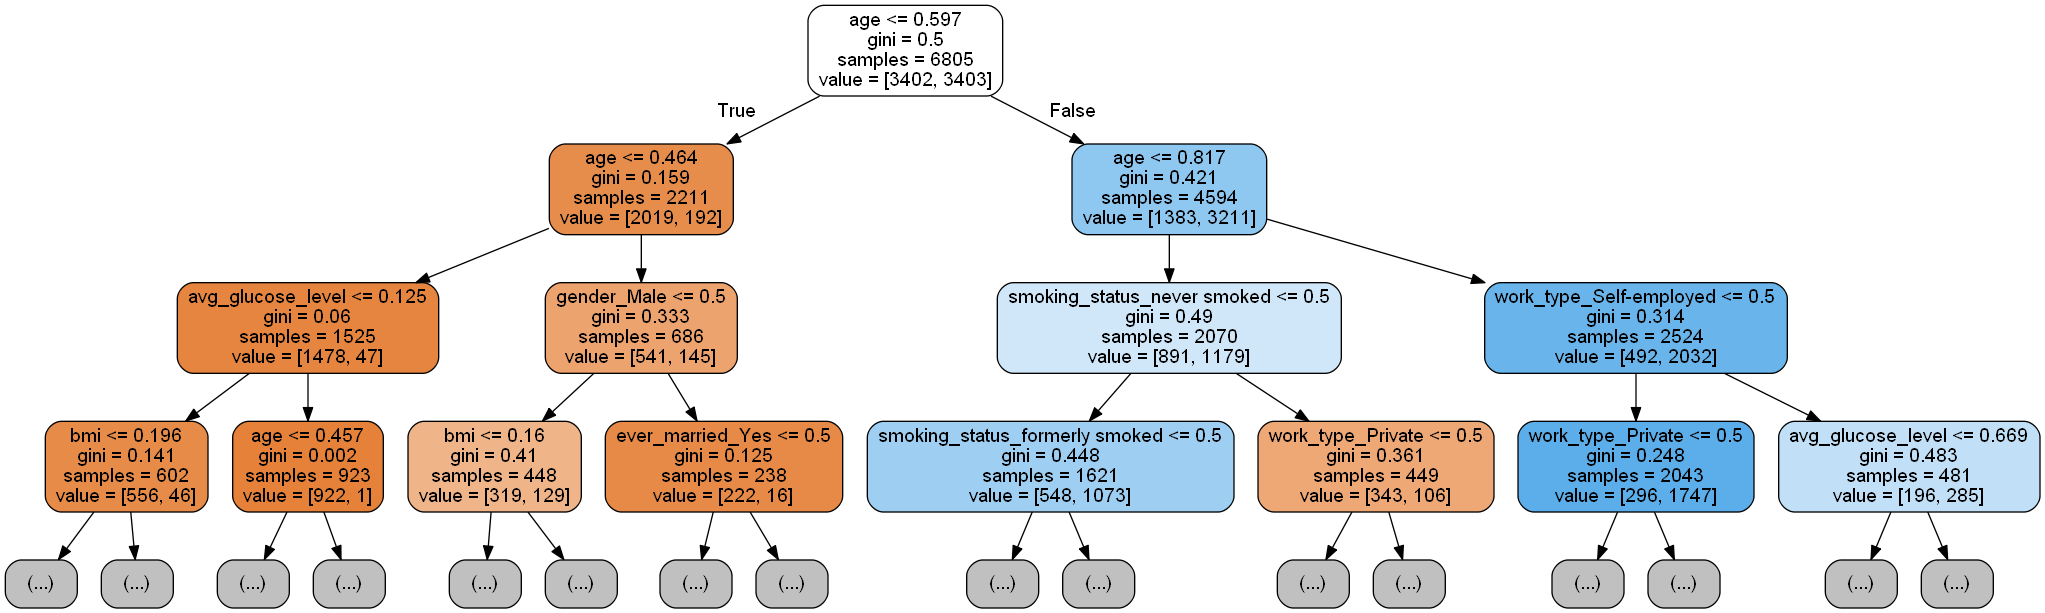

In [119]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=X.columns,filled=True,rounded=True,max_depth=3)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

# Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators=250)
rforest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250)

In [121]:
print(classification_report(y_test, rforest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1459
           1       0.94      0.96      0.95      1458

    accuracy                           0.95      2917
   macro avg       0.95      0.95      0.95      2917
weighted avg       0.95      0.95      0.95      2917



# XGB

In [122]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [123]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1459
           1       0.95      0.96      0.96      1458

    accuracy                           0.96      2917
   macro avg       0.96      0.96      0.96      2917
weighted avg       0.96      0.96      0.96      2917



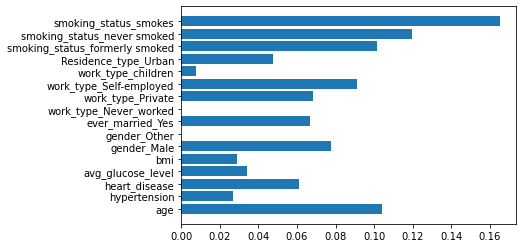

In [124]:
plt.barh(X.columns, xgb.feature_importances_);

# KNN

In [125]:
from sklearn.neighbors import KNeighborsClassifier
errors = []
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    
    knn.fit(X_train,y_train)
    
    pred = knn.predict(X_test)
    
    errors.append(np.mean(pred!=y_test))

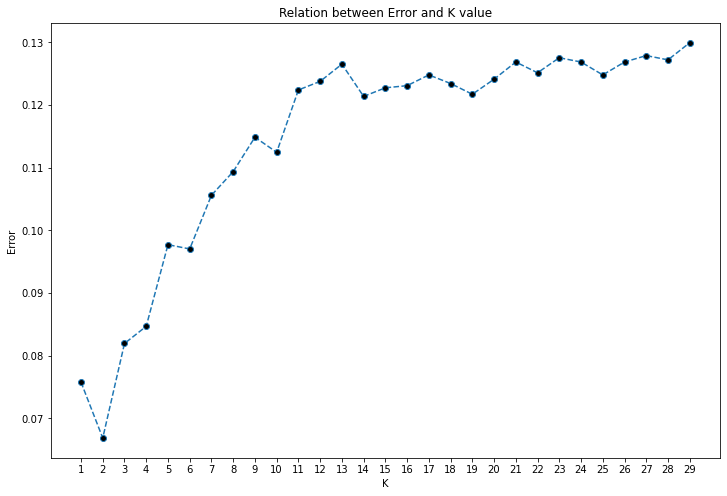

In [126]:
plt.figure(figsize=(12,8))
plt.plot(range(1,30),errors,marker='o',markerfacecolor='black',linestyle='dashed')

plt.title('Relation between Error and K value')
plt.xlabel('K')
plt.ylabel('Error')
plt.xticks(range(1,30))
plt.show()

In [127]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [128]:
print(grid_search.best_params_)

{'n_neighbors': 2}


In [129]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [130]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1459
           1       0.93      0.94      0.93      1458

    accuracy                           0.93      2917
   macro avg       0.93      0.93      0.93      2917
weighted avg       0.93      0.93      0.93      2917

